In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('customer_segmentation_cleaned.csv')

In [6]:
# Display the first few rows
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.619777,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.619777,High,6.0,Cat_6,A


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10587 entries, 0 to 10586
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10587 non-null  int64  
 1   Gender           10587 non-null  object 
 2   Ever_Married     10587 non-null  object 
 3   Age              10587 non-null  int64  
 4   Graduated        10587 non-null  object 
 5   Profession       10587 non-null  object 
 6   Work_Experience  10587 non-null  float64
 7   Spending_Score   10587 non-null  object 
 8   Family_Size      10587 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10587 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 909.9+ KB


In [6]:
# Dropping the "ID" as it is not related to model building
df = df.drop(['ID'], axis=1)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

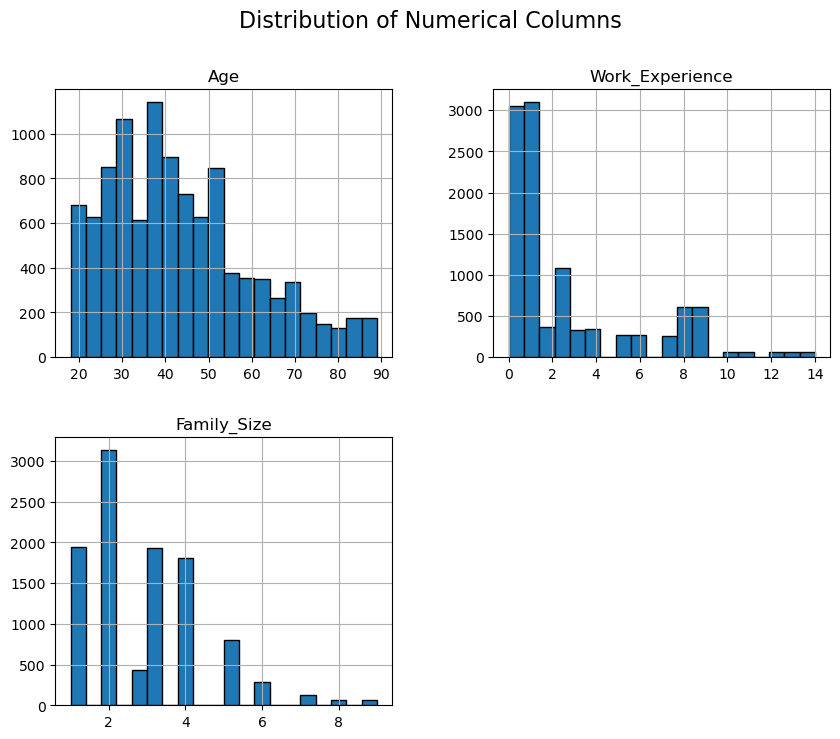

In [14]:
# Plotting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.show()

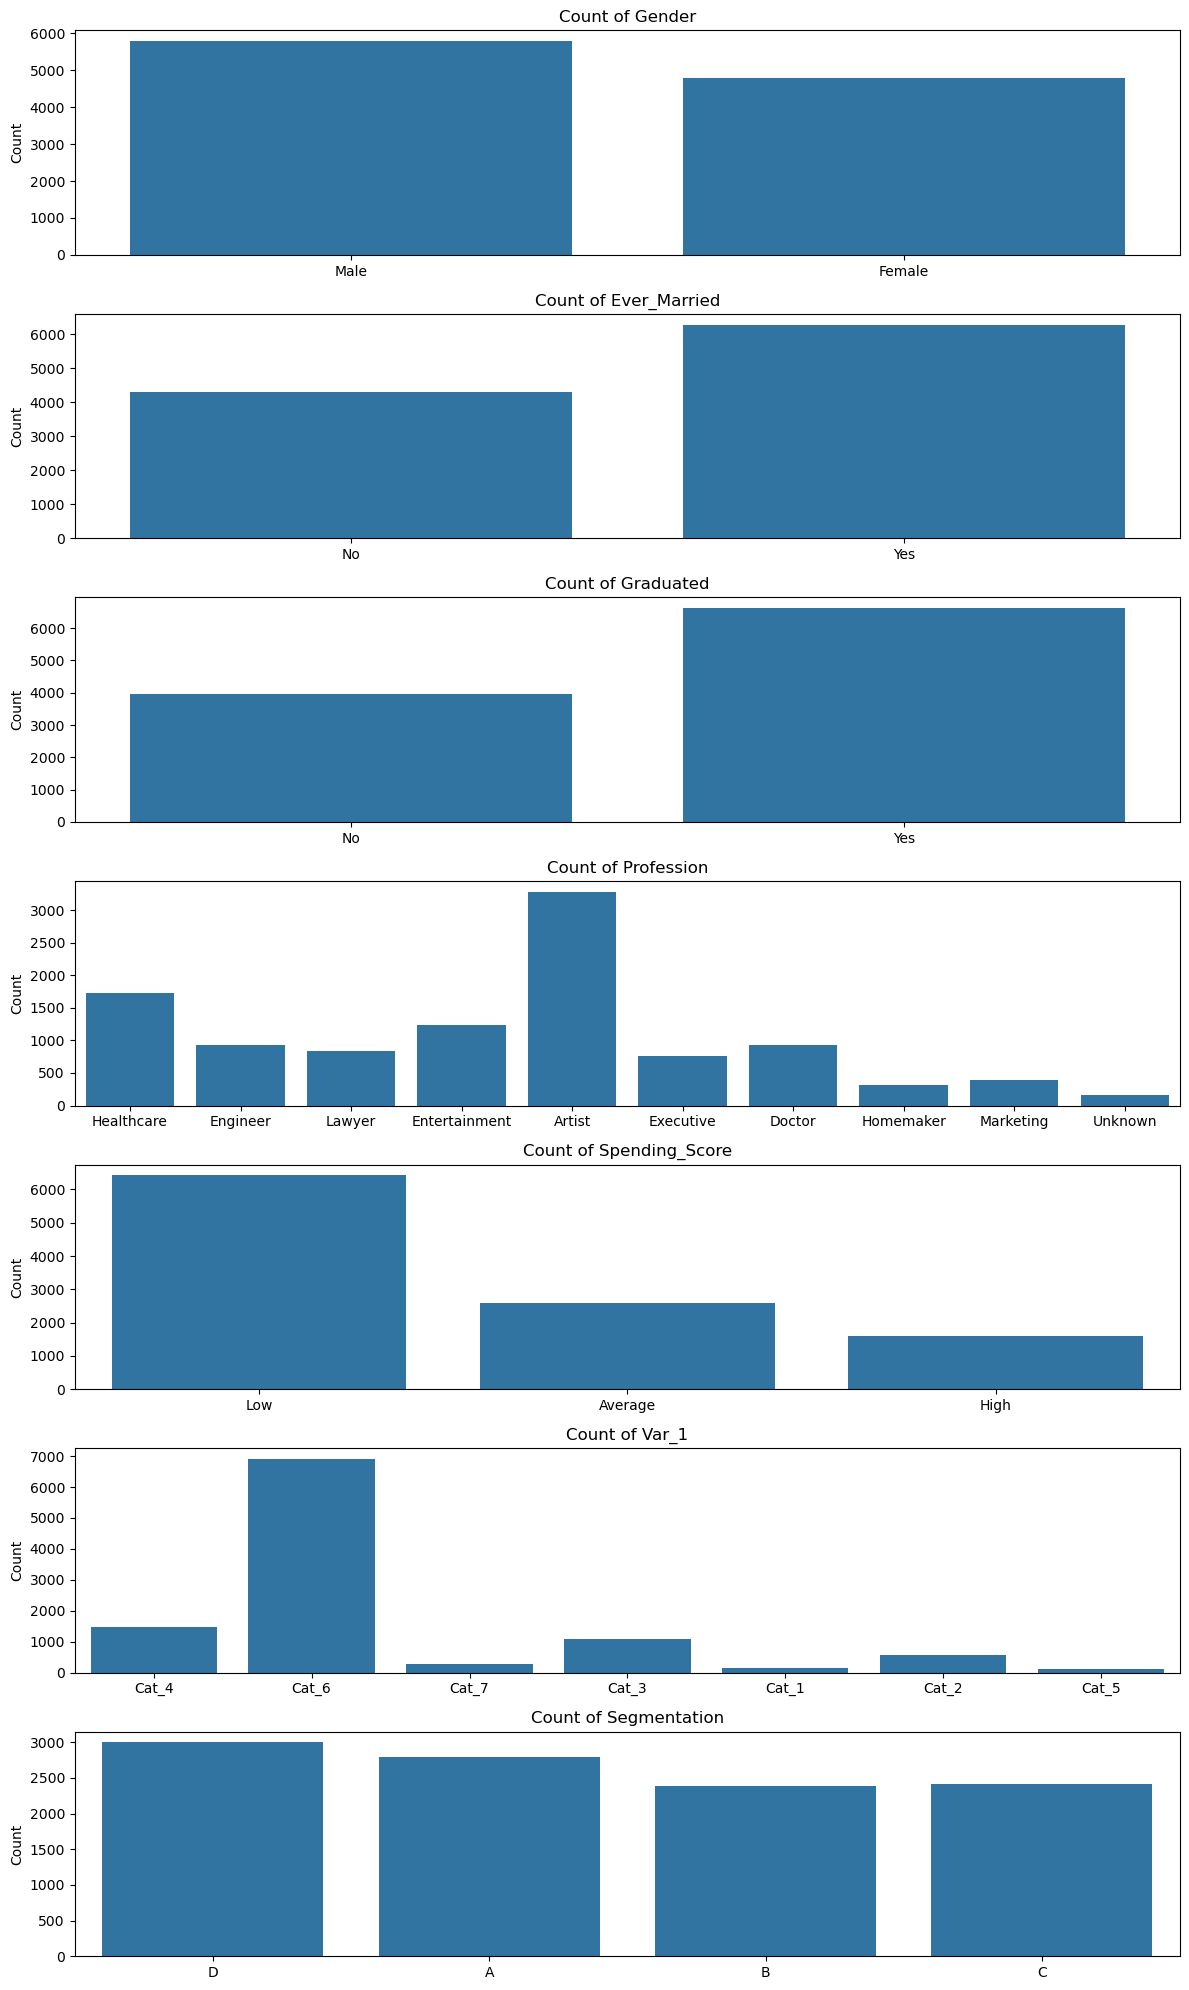

In [14]:
# Plotting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(12, 20))
for ax, column in zip(axes, categorical_columns):
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(f'Count of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
# Perform feature scaling on numerical columns
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [14]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [16]:
# Encode categorical columns
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [18]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,-1.280582,0,5,-0.508916,2,0.764398,3,3
1,0,1,-0.323531,1,2,-0.000284,0,0.099283,3,0
2,0,1,1.411125,1,2,-0.508916,2,-1.230946,5,1
3,1,1,1.411125,1,7,-0.819659,1,-0.565831,5,1
4,0,1,-0.203899,1,3,-0.000284,1,2.094627,5,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
# Define features and target variable
X = df.drop(columns=['Segmentation'])  
y = df['Segmentation']

In [28]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [34]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.4801
Precision: 0.4751
Recall: 0.4801
F1-score: 0.4767


In [44]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [40]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [46]:
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [48]:
# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [50]:
# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [52]:
# Predict on the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [54]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.5352
Precision: 0.5301
Recall: 0.5352
F1-score: 0.5302


In [56]:
from sklearn.metrics import confusion_matrix

In [60]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confustion Matrix after tuning",conf_matrix)


Confustion Matrix after tuning [[285 117  63 144]
 [155 199 143  75]
 [ 75 113 345  81]
 [142  35  12 501]]


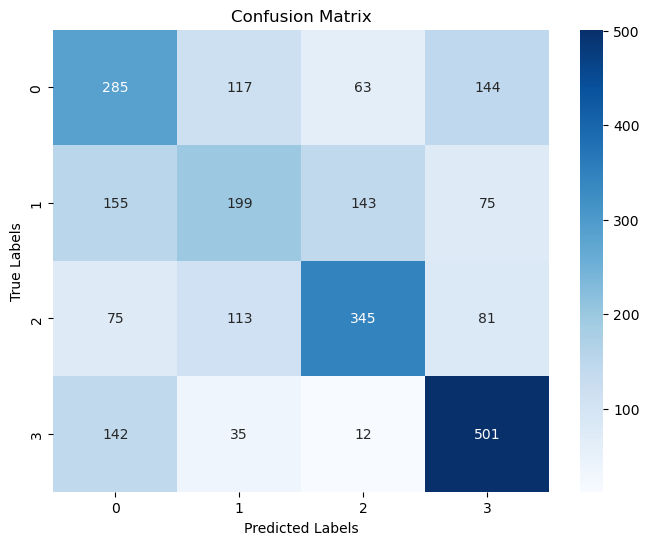

In [62]:
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [72]:
from sklearn.model_selection import KFold, cross_val_score

In [78]:
# Define k values to evaluate, k= 5 and k=10
k_values = [5, 10]

# Dictionary to store evaluation results
evaluation_results = {}

In [80]:
# Loop over each k value
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Perform cross-validation and evaluate the results
    cv_accuracy = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')
    cv_precision = cross_val_score(rf_classifier, X, y, cv=kf, scoring='precision_weighted')
    cv_recall = cross_val_score(rf_classifier, X, y, cv=kf, scoring='recall_weighted')
    cv_f1 = cross_val_score(rf_classifier, X, y, cv=kf, scoring='f1_weighted')
    
    # Store the evaluation metrics for the current k value
    evaluation_results[k] = {
        'Accuracy': (cv_accuracy.mean(), cv_accuracy.std()),
        'Precision': (cv_precision.mean(), cv_precision.std()),
        'Recall': (cv_recall.mean(), cv_recall.std()),
        'F1-score': (cv_f1.mean(), cv_f1.std())
    }

In [82]:
# Display the evaluation results
for k, metrics in evaluation_results.items():
    print(f"\nEvaluation Metrics for k={k}:")
    for metric, values in metrics.items():
        mean, std = values
        print(f'{metric}: {mean:.4f} ± {std:.4f}')


Evaluation Metrics for k=5:
Accuracy: 0.4833 ± 0.0098
Precision: 0.4778 ± 0.0085
Recall: 0.4833 ± 0.0098
F1-score: 0.4798 ± 0.0090

Evaluation Metrics for k=10:
Accuracy: 0.4865 ± 0.0170
Precision: 0.4828 ± 0.0173
Recall: 0.4865 ± 0.0170
F1-score: 0.4833 ± 0.0169


In [86]:
# Perform feature importance
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [90]:
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features = feature_importances.head(10)

C:\Users\hxiuf\AppData\Local\Temp\ipykernel_14532\3417957381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


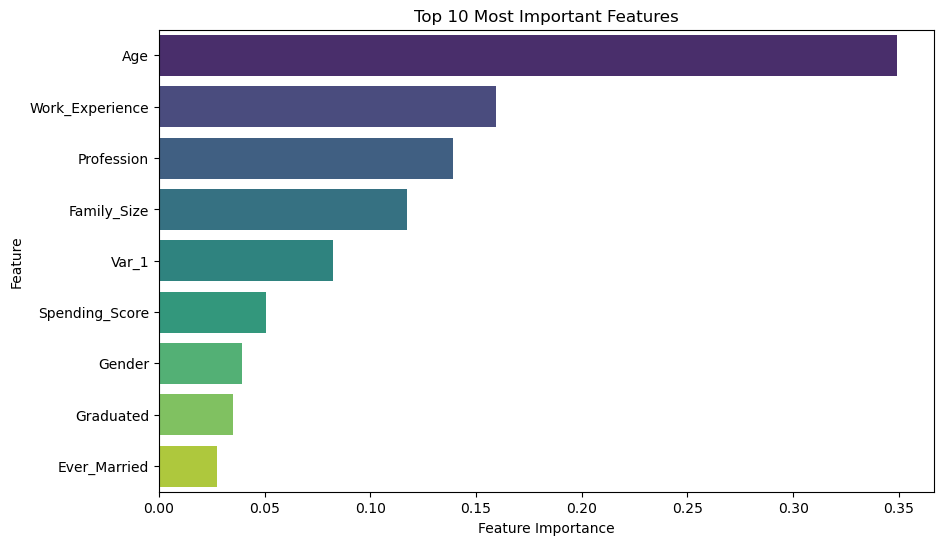

In [92]:
# Visualize the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()